In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


# Load your dataset with the help of pandas library
data = pd.read_csv('/content/drive/MyDrive/dataset/Restaurant_Reviews.tsv' ,delimiter='\t',quoting=3)

In [ ]:
#Natural Language Processing with help of nltk we remove the stopwords.
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Preprocess your data (tokenization, lowercase, etc.)
from sklearn.feature_extraction.text import CountVectorizer
features=CountVectorizer(max_features=1500)
x=features.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
# Train a Bernouli navie bayes model

from sklearn.naive_bayes import BernoulliNB

#fitting the model
model=BernoulliNB ()
model.fit(X_train, y_train)

# Transform the testing data and make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
precision=precision_score(y_test,y_pred)
recal = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100.0)
print("precision:", precision*100.0)
print("recall:", recal*100.0)

Accuracy: 77.0
precision: 77.14285714285715
recall: 78.64077669902912


In [ ]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
con

array([[73, 24],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

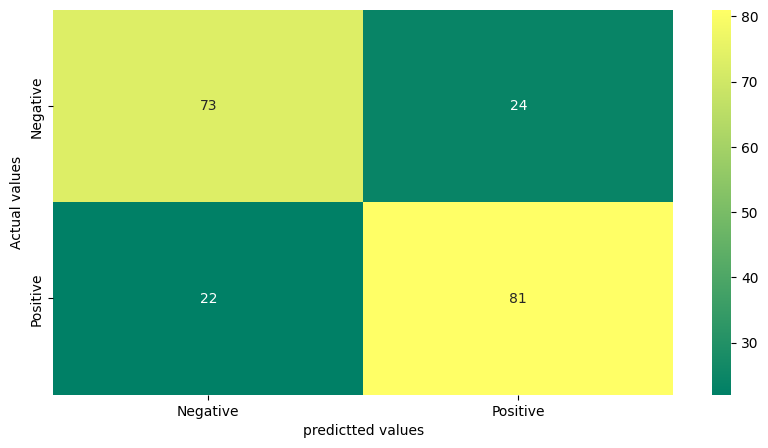

In [ ]:
import matplotlib.pyplot as pt
import seaborn as sb
pt.figure(figsize=(10,5))
sb.heatmap(con,annot=True,cmap="summer",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
pt.xlabel('predictted values')
pt.ylabel('Actual values')

In [ ]:
#hyper Parameter tuning process
import numpy as np
best_accuracy_score = 0.0
alpha_value =0.0
for i in np.arange(0.0,1.0,0.1):
  temp_model = BernoulliNB(alpha=i)
  temp_model.fit(X_train,y_train)
  temp_y_pred =temp_model.predict(X_test)
  Ac_score = accuracy_score(y_test,temp_y_pred)

  print("Accuracy score for alpha={} is {}%".format(round(i,1),round(Ac_score*100,2)))
  if Ac_score>best_accuracy_score:
    best_accuracy_score=Ac_score
    alpha_val=i
print('This is best Accuracy score:')
print("Accuracy score for alpha={} with alpha value {}%".format(round(best_accuracy_score*100,2),round(alpha_val,2)))


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is 77.0%
Accuracy score for alpha=0.1 is 78.5%
Accuracy score for alpha=0.2 is 78.5%
Accuracy score for alpha=0.3 is 79.0%
Accuracy score for alpha=0.4 is 78.5%
Accuracy score for alpha=0.5 is 78.0%
Accuracy score for alpha=0.6 is 78.0%
Accuracy score for alpha=0.7 is 78.0%
Accuracy score for alpha=0.8 is 77.5%
Accuracy score for alpha=0.9 is 77.0%
This is best Accuracy score:
Accuracy score for alpha=79.0 with alpha value 0.3%


In [ ]:
#again fit model with which have high accuracy with alpha value
model=BernoulliNB(alpha=0.3)
model.fit(X_train,y_train)

BernoulliNB(alpha=0.3)

In [ ]:
#validation or Prediction the Review
from nltk.stem import porter
def predict_sentiment_review(sample_review):
  sample_review=sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review= ' '.join(final_review)
  temp=features.transform([final_review]).toarray()
  return model.predict(temp)

In [ ]:
sample_review=input("enter you are review:")
result=predict_sentiment_review(sample_review)
if(result):
  print("this is positive review")
else:
  print("this is negative review")

enter you are review:the food smells like cow dung 
this is negative review
